In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
np.random.seed(42)
n = 400
t = np.linspace(0,10,n)
trend = 0.5 * t
seasonal = np.sin(2 * np.pi * t)
cyclical = 0.1 * np.sin (2 * np.pi * t / 5)
noise=0.2*np.random.normal(size=n)
data=trend+seasonal+cyclical+noise

In [13]:
data = pd.read_csv('train.csv')
arcadia_data = data[data['kingdom'] == 'Arcadia']

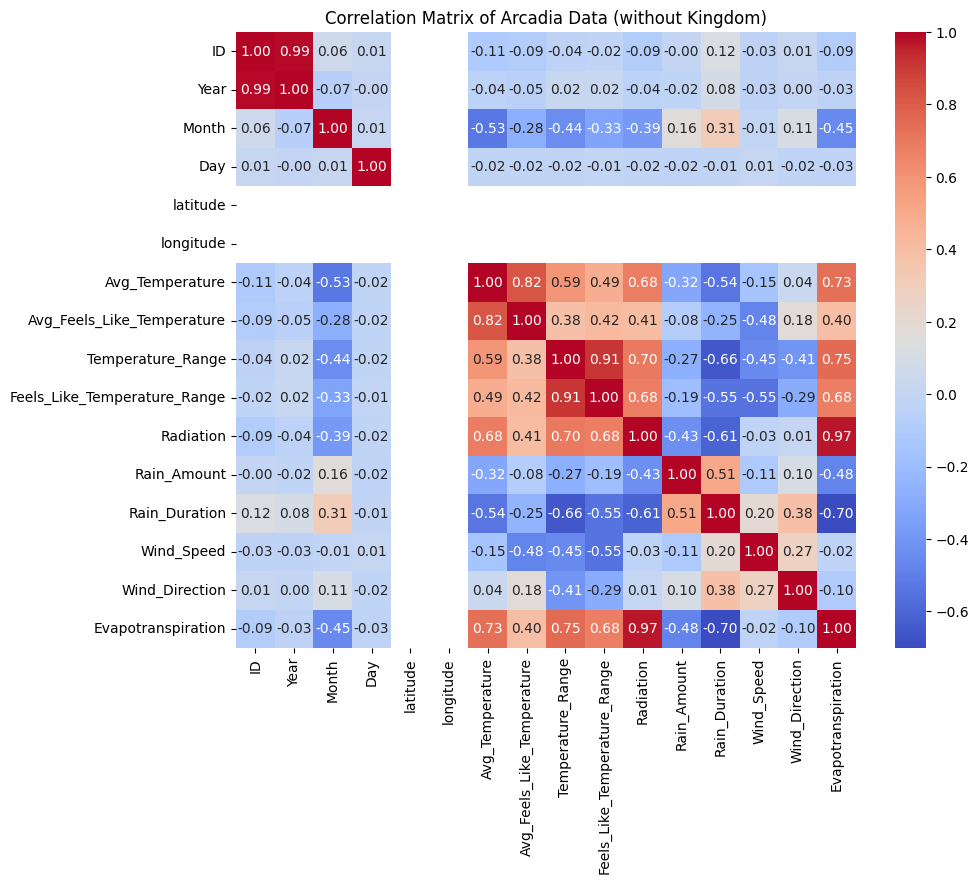

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(42)
n = 400
t = np.linspace(0,10,n)
trend = 0.5 * t
seasonal = np.sin(2 * np.pi * t)
cyclical = 0.1 * np.sin (2 * np.pi * t / 5)
noise=0.2*np.random.normal(size=n)
data=trend+seasonal+cyclical+noise
data = pd.read_csv('train.csv')
arcadia_data = data[data['kingdom'] == 'Arcadia']

arcadia_data = arcadia_data.drop('kingdom', axis=1)

# Calculate the correlation matrix
correlation_matrix = arcadia_data.corr()

# Create the correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Arcadia Data')
plt.show()


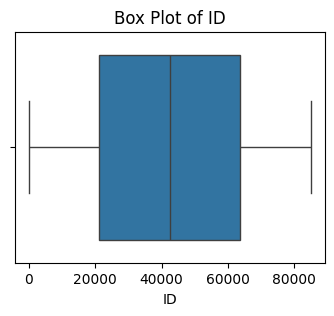

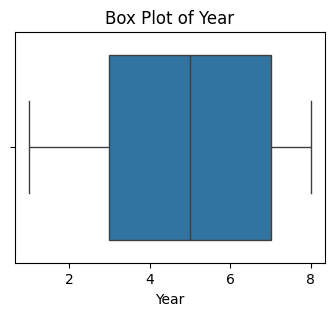

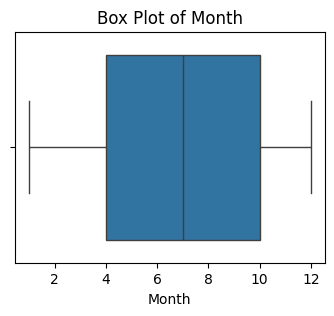

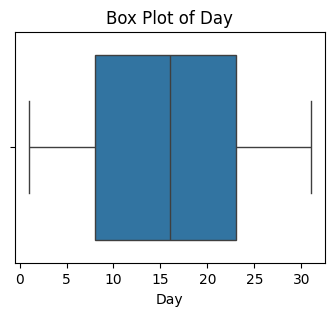

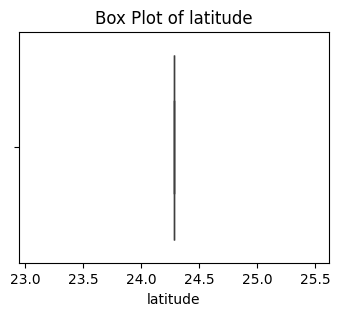

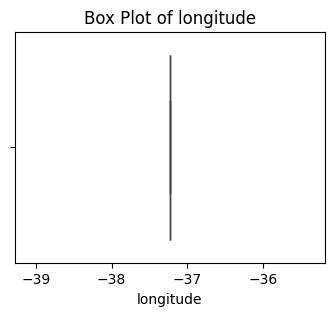

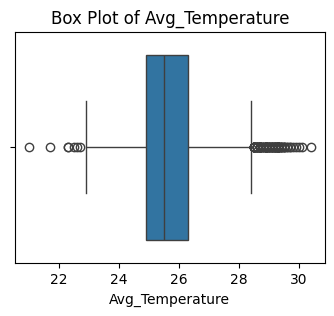

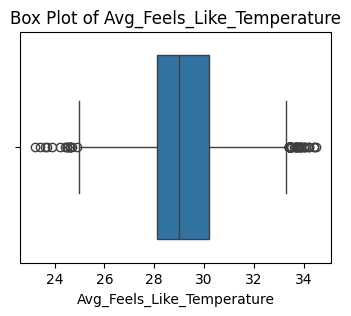

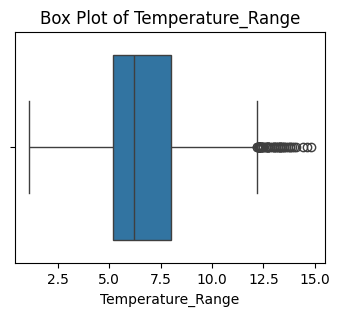

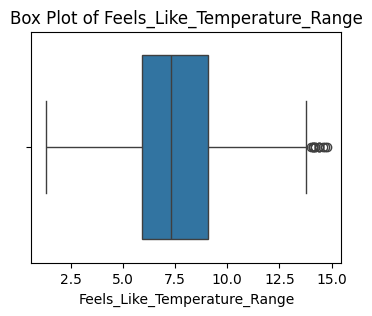

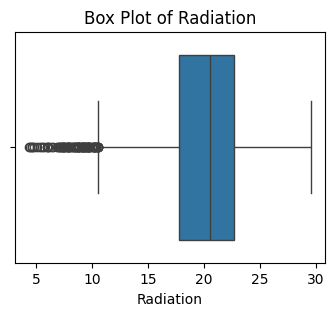

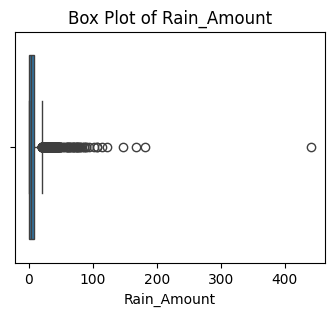

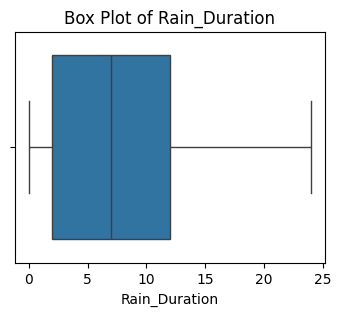

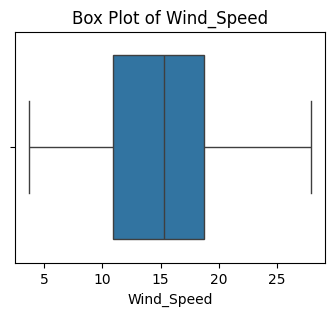

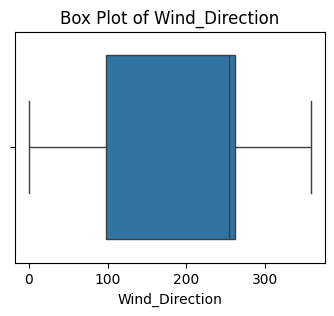

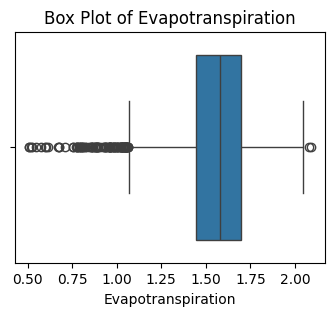

In [26]:
import seaborn as sns
numerical_cols = arcadia_data.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=arcadia_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [14]:
arcadia_data['Year'] = arcadia_data['Year'] + 2002
arcadia_data['Date'] = pd.to_datetime(arcadia_data[['Year', 'Month', 'Day']])

<ipython-input-14-acd527613f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arcadia_data['Year'] = arcadia_data['Year'] + 2002
<ipython-input-14-acd527613f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arcadia_data['Date'] = pd.to_datetime(arcadia_data[['Year', 'Month', 'Day']])


In [15]:
df = pd.DataFrame(arcadia_data.iloc[:400], columns=['Rain_Amount'])
df.index = pd.date_range(start='2005-01-01', periods=n, freq='MS')

<ipython-input-16-3d7ff2224380>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arcadia_data['Avg_Temperature'].fillna(arcadia_data['Avg_Temperature'].mean(), inplace=True)
<ipython-input-16-3d7ff2224380>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arcadia_data['Avg_Temperature'].fillna(arcadia_data['Avg_Temperature'].mean(), inplace=Tru

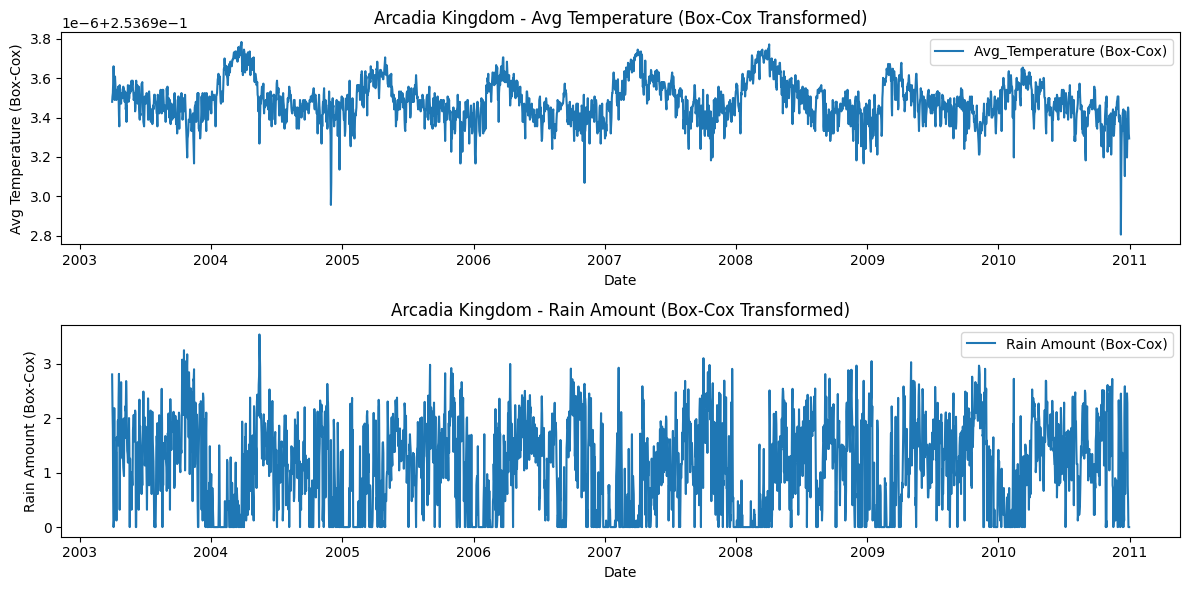

In [16]:
from scipy import stats

# Select the relevant columns and handle potential missing values
arcadia_data['Avg_Temperature'].fillna(arcadia_data['Avg_Temperature'].mean(), inplace=True)
arcadia_data['Rain_Amount'].fillna(arcadia_data['Rain_Amount'].mean(), inplace=True)

# Apply Box-Cox transformation
arcadia_data['Avg_Temperature_BoxCox'], lambda_temp = stats.boxcox(arcadia_data['Avg_Temperature'] + 1)
arcadia_data['Rain_Amount_BoxCox'], lambda_rain = stats.boxcox(arcadia_data['Rain_Amount'] + 1)


# Plotting the time series
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arcadia_data['Date'], arcadia_data['Avg_Temperature_BoxCox'], label='Avg_Temperature (Box-Cox)')
plt.title('Arcadia Kingdom - Avg Temperature (Box-Cox Transformed)')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (Box-Cox)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(arcadia_data['Date'], arcadia_data['Rain_Amount_BoxCox'], label='Rain Amount (Box-Cox)')
plt.title('Arcadia Kingdom - Rain Amount (Box-Cox Transformed)')
plt.xlabel('Date')
plt.ylabel('Rain Amount (Box-Cox)')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
Rain_Amount_df = data[data['Rain_Duration'] <= 0]
Rain_Amount_df

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
64,65,1,4,3,Dorne,25.780002,-37.530000,29.20,33.60,5.0,6.5,25.40,0.0,0,18.4,253,1.893112
86,87,1,4,3,Sunspear,26.580005,-37.530000,29.70,33.90,4.2,5.3,24.19,0.0,0,21.2,245,1.880991
104,105,1,4,4,Mordor,23.080005,-36.329990,28.30,33.90,6.0,8.2,25.00,0.0,0,12.7,289,1.783391
111,112,1,4,4,Rivendell,23.780002,-36.929994,294.75,298.25,7.4,9.7,24.90,0.0,0,4.4,52,1.701105
115,116,1,4,4,Solstice,25.479998,-36.329990,28.90,34.10,6.5,8.0,27.80,0.0,0,18.9,177,1.909543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84953,84954,8,12,31,Shangri-La,23.780002,-37.630006,25.30,28.30,8.7,11.2,22.29,0.0,0,8.6,72,1.665818
84954,84955,8,12,31,Solara,23.380000,-37.530000,298.45,302.25,7.2,8.4,22.29,0.0,0,8.6,72,1.621366
84957,84958,8,12,31,Utopia,23.979999,-37.630006,298.75,301.65,7.6,9.2,22.67,0.0,0,12.6,71,1.710188
84958,84959,8,12,31,Valyria,24.280002,-35.729980,25.60,28.10,4.0,3.8,19.72,0.0,0,16.3,54,1.613430


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


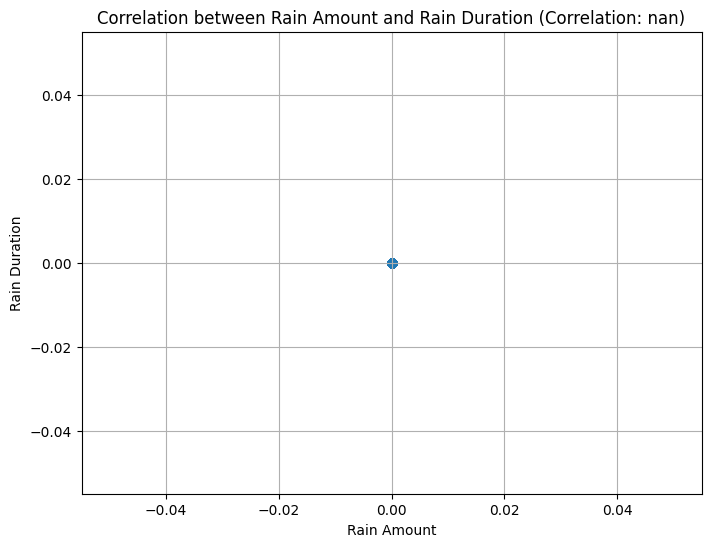

In [18]:
# Calculate the correlation
correlation = Rain_Amount_df['Rain_Amount'].corr(Rain_Amount_df['Rain_Duration'])

# Create the correlation graph
plt.figure(figsize=(8, 6))
plt.scatter(Rain_Amount_df['Rain_Amount'], Rain_Amount_df['Rain_Duration'])
plt.title(f'Correlation between Rain Amount and Rain Duration (Correlation: {correlation:.2f})')
plt.xlabel('Rain Amount')
plt.ylabel('Rain Duration')
plt.grid(True)
plt.show()


In [19]:
# Apply Box-Cox transformation to 'Rain_Amount' and add it as a new column
arcadia_data['Rain_Amount_BoxCox'], lambda_rain = stats.boxcox(arcadia_data['Rain_Amount'] + 1)  # Adding 1 to handle zero values
arcadia_data

<ipython-input-19-5e943aa98c2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arcadia_data['Rain_Amount_BoxCox'], lambda_rain = stats.boxcox(arcadia_data['Rain_Amount'] + 1)  # Adding 1 to handle zero values


,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date,Avg_Temperature_BoxCox,Rain_Amount_BoxCox
0,1,2003,4,1,Arcadia,24.280002,-37.22998,25.5,30.5,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,2003-04-01,0.253693,2.805287
30,31,2003,4,2,Arcadia,24.280002,-37.22998,25.8,31.1,8.7,11.4,24.29,16.77,7,9.4,257,1.713798,2003-04-02,0.253694,2.194070
60,61,2003,4,3,Arcadia,24.280002,-37.22998,26.0,30.9,7.5,10.0,23.33,8.19,4,9.4,252,1.682688,2003-04-03,0.253694,1.795458
90,91,2003,4,4,Arcadia,24.280002,-37.22998,26.7,31.6,8.1,10.0,23.35,0.91,3,10.4,247,1.704748,2003-04-04,0.253694,0.607395
120,121,2003,4,5,Arcadia,24.280002,-37.22998,27.9,32.8,10.1,12.8,26.85,0.00,0,10.6,256,1.851599,2003-04-05,0.253694,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84810,84811,2010,12,27,Arcadia,24.280002,-37.22998,24.8,29.4,8.0,10.0,20.82,1.30,8,5.2,114,1.558145,2010-12-27,0.253693,0.767906
84840,84841,2010,12,28,Arcadia,24.280002,-37.22998,25.2,29.4,8.1,8.7,19.95,0.65,3,10.0,96,1.541159,2010-12-28,0.253693,0.476769
84870,84871,2010,12,29,Arcadia,24.280002,-37.22998,25.0,27.9,8.5,8.9,22.97,0.00,0,15.5,102,1.693779,2010-12-29,0.253693,0.000000
84900,84901,2010,12,30,Arcadia,24.280002,-37.22998,24.0,25.8,9.0,10.2,23.29,0.00,0,16.1,97,1.710188,2010-12-30,0.253693,0.000000


          ID  Year  Month  Day  kingdom   latitude  longitude  \
30        31  2003      4    2  Arcadia  24.280002  -37.22998   
60        61  2003      4    3  Arcadia  24.280002  -37.22998   
90        91  2003      4    4  Arcadia  24.280002  -37.22998   
120      121  2003      4    5  Arcadia  24.280002  -37.22998   
150      151  2003      4    6  Arcadia  24.280002  -37.22998   
...      ...   ...    ...  ...      ...        ...        ...   
84810  84811  2010     12   27  Arcadia  24.280002  -37.22998   
84840  84841  2010     12   28  Arcadia  24.280002  -37.22998   
84870  84871  2010     12   29  Arcadia  24.280002  -37.22998   
84900  84901  2010     12   30  Arcadia  24.280002  -37.22998   
84930  84931  2010     12   31  Arcadia  24.280002  -37.22998   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
30                25.8                        31.1                8.7   
60                26.0                        30.9                7.5   


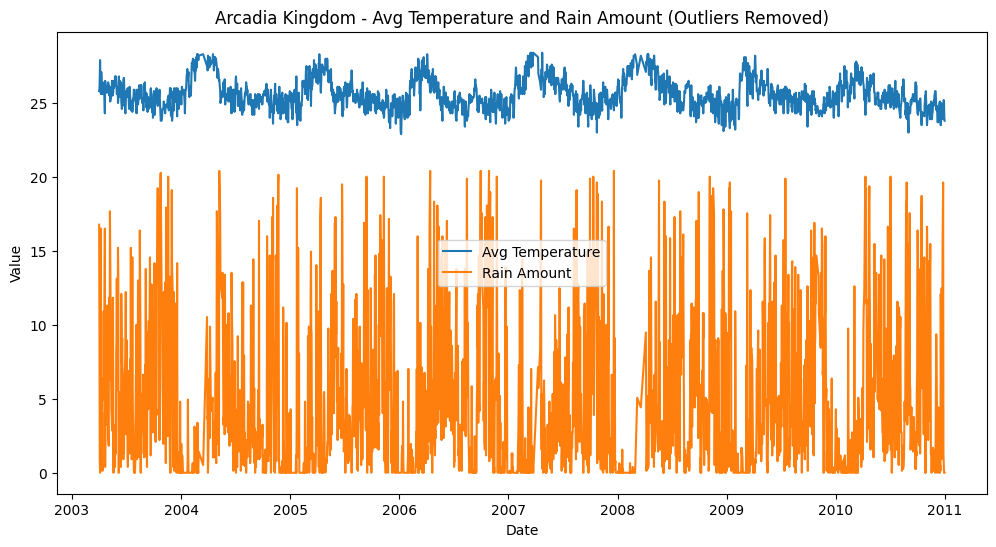

In [20]:
# IQR method for outlier removal
def remove_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for 'Avg_Temperature' and 'Rain_Amount'
arcadia_data_no_outliers = remove_outliers_iqr(arcadia_data, 'Avg_Temperature')
arcadia_data_no_outliers = remove_outliers_iqr(arcadia_data_no_outliers, 'Rain_Amount')

# Display the DataFrame without outliers
print(arcadia_data_no_outliers)

plt.figure(figsize=(12, 6))
plt.plot(arcadia_data_no_outliers['Date'], arcadia_data_no_outliers['Avg_Temperature'], label='Avg Temperature')
plt.plot(arcadia_data_no_outliers['Date'], arcadia_data_no_outliers['Rain_Amount'], label='Rain Amount')

plt.title('Arcadia Kingdom - Avg Temperature and Rain Amount (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


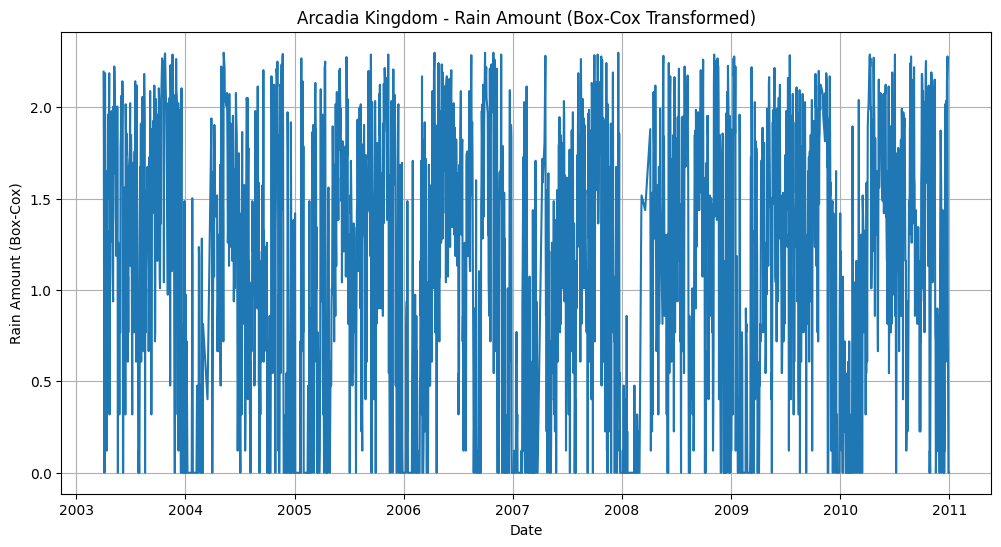

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(arcadia_data_no_outliers['Date'], arcadia_data_no_outliers['Rain_Amount_BoxCox'])
plt.title('Arcadia Kingdom - Rain Amount (Box-Cox Transformed)')
plt.xlabel('Date')
plt.ylabel('Rain Amount (Box-Cox)')
plt.grid(True)
plt.show()


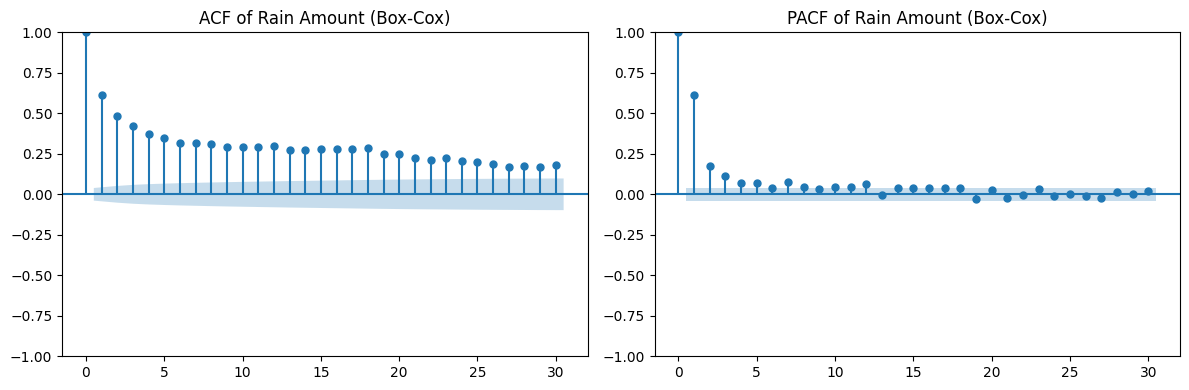

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(arcadia_data_no_outliers['Rain_Amount_BoxCox'], lags=30, ax=axes[0])
axes[0].set_title('ACF of Rain Amount (Box-Cox)')

plot_pacf(arcadia_data_no_outliers['Rain_Amount_BoxCox'], lags=30, ax=axes[1])
axes[1].set_title('PACF of Rain Amount (Box-Cox)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, max_d=5):
    # ADF test
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Determine differencing order
    p_value = result[1]
    if p_value > 0.05:
        print("\nThe time series is likely non-stationary.")
        d = 0
        for i in range(1, max_d + 1):
          differenced_series = timeseries.diff(i).dropna()
          result = adfuller(differenced_series)
          print(f"\nDifferencing order {i}:")
          print('ADF Statistic: %f' % result[0])
          print('p-value: %f' % result[1])
          if result[1] <= 0.05:
              d = i
              print(f"Time series becomes stationary after {d} differencing")
              break
    else:
        print("\nThe time series is likely stationary.")
        d = 0

    return d

d = check_stationarity(arcadia_data_no_outliers['Wind_Speed'])
print(f"\nDifferencing value: {d}")


ADF Statistic: -7.084043
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

The time series is likely stationary.

Differencing value: 0


Test RMSE: 5.307984019037325


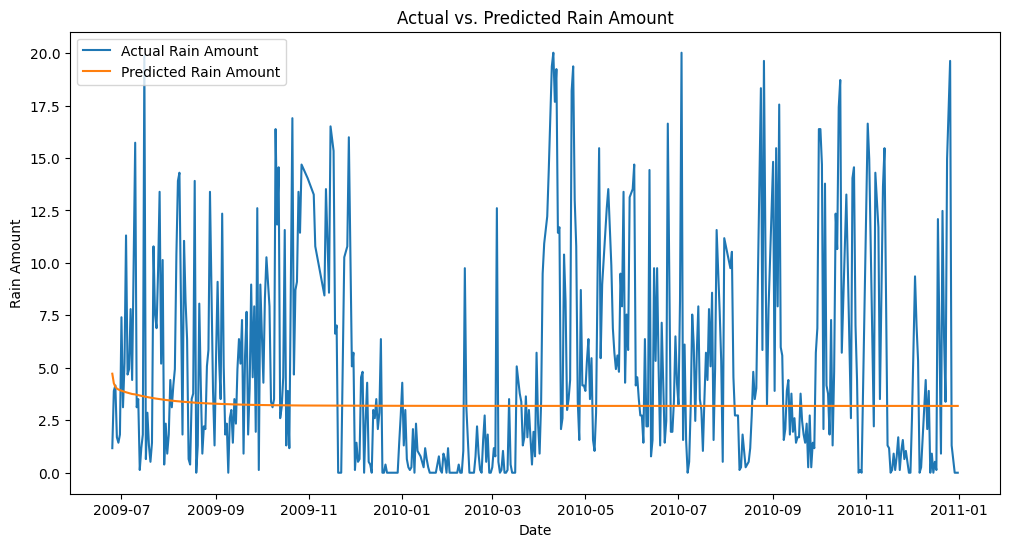

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from scipy.special import inv_boxcox

# Split data into training and testing sets
train_data, test_data = train_test_split(arcadia_data_no_outliers, test_size=0.2, shuffle=False)

# Fit ARIMA model
model = ARIMA(train_data['Rain_Amount_BoxCox'], order=(2,0,0)) # Example order, adjust as needed
model_fit = model.fit()


# Make predictions on the test set
predictions_boxcox = model_fit.predict(start=len(train_data), end=len(arcadia_data_no_outliers)-1)

# Inverse Box-Cox transformation to get predictions in original scale
predictions = inv_boxcox(predictions_boxcox, lambda_rain)

# Evaluate the model (example using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Rain_Amount'], predictions))
print(f'Test RMSE: {rmse}')

# Plot predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Rain_Amount'], label='Actual Rain Amount')
plt.plot(test_data['Date'], predictions, label='Predicted Rain Amount')
plt.title('Actual vs. Predicted Rain Amount')
plt.xlabel('Date')
plt.ylabel('Rain Amount')
plt.legend()
plt.show()


In [ ]:
df = test_data[['ID', 'Rain_Amount']]
df.loc[df['Rain_Amount'] < 0, 'Rain_Amount'] = 0

In [ ]:
df = pd.read_csv("submission1 (1).csv")
df.loc[df['Rain_Amount'] < 0, 'Rain_Amount'] = 0

In [ ]:
df

,ID,Year,Month,Day,kingdom,Date,Rain_Amount
0,84961,10019,1,1,Arcadia,2011-01-01,0.000000
1,84962,10019,1,1,Atlantis,2011-01-01,18.380940
2,84963,10019,1,1,Avalon,2011-01-01,14.282793
3,84964,10019,1,1,Camelot,2011-01-01,15.858755
4,84965,10019,1,1,Dorne,2011-01-01,23.850798
...,...,...,...,...,...,...,...
4525,89486,10019,5,31,Solstice,2011-05-31,7.731034
4526,89487,10019,5,31,Sunspear,2011-05-31,3.382290
4527,89488,10019,5,31,Utopia,2011-05-31,8.318242
4528,89489,10019,5,31,Valyria,2011-05-31,4.518367


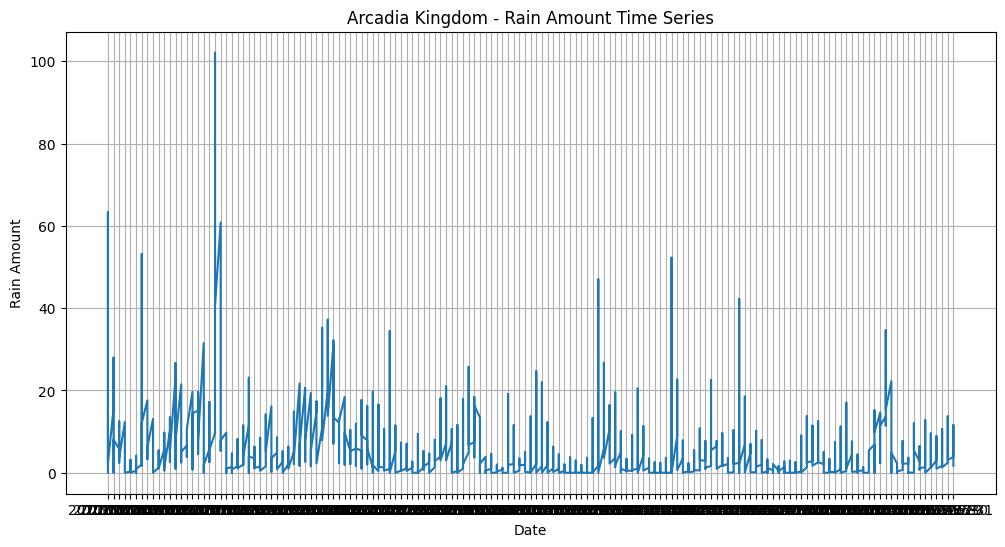

In [ ]:
# test_data['Year'] = test_data['Year'] + 2002
# test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']])

# Create the time series plot for 'Rain_Amount_BoxCox'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rain_Amount'])
plt.xlabel('Date')
plt.ylabel('Rain Amount')
plt.title('Arcadia Kingdom - Rain Amount Time Series')
plt.grid(True)
plt.show()


In [ ]:
df[['ID', 'Rain_Amount']].to_csv('submission1.csv', index=False)

In [ ]:
test_prediction_df = pd.read_csv('test-prediction.csv')
test_prediction_df

,ID,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction
0,84961,26.335000,23.252700,0.000000,11.943333,78.811391
1,84962,26.546500,23.715200,18.380940,11.788000,50.346265
2,84963,26.737533,23.632300,14.282793,12.254000,39.016272
3,84964,22.999500,22.809300,15.858755,10.248667,81.779738
4,84965,25.987000,22.261600,23.850798,18.608000,80.794870
...,...,...,...,...,...,...
4525,89486,25.573000,23.411800,7.731034,27.064000,290.606173
4526,89487,25.598000,23.733100,3.382290,27.384000,262.421688
4527,89488,26.679667,14.194000,8.318242,16.255000,277.399674
4528,89489,25.638000,18.906700,4.518367,11.644000,333.982581


In [ ]:
test_csv = pd.read_csv('test.csv')
test_prediction_df = pd.read_csv('test-prediction.csv')

# Merge the datasets based on the 'ID' column
merged_df = pd.merge(test_csv, test_prediction_df, on='ID', how='left')
merged_df['Year'] = merged_df['Year'] + 2002
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

In [ ]:
merged_df

,ID,Year,Month,Day,kingdom,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction,Date
0,84961,2011,1,1,Arcadia,26.335000,23.252700,0.000000,11.943333,78.811391,2011-01-01
1,84962,2011,1,1,Atlantis,26.546500,23.715200,18.380940,11.788000,50.346265,2011-01-01
2,84963,2011,1,1,Avalon,26.737533,23.632300,14.282793,12.254000,39.016272,2011-01-01
3,84964,2011,1,1,Camelot,22.999500,22.809300,15.858755,10.248667,81.779738,2011-01-01
4,84965,2011,1,1,Dorne,25.987000,22.261600,23.850798,18.608000,80.794870,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...
4525,89486,2011,5,31,Solstice,25.573000,23.411800,7.731034,27.064000,290.606173,2011-05-31
4526,89487,2011,5,31,Sunspear,25.598000,23.733100,3.382290,27.384000,262.421688,2011-05-31
4527,89488,2011,5,31,Utopia,26.679667,14.194000,8.318242,16.255000,277.399674,2011-05-31
4528,89489,2011,5,31,Valyria,25.638000,18.906700,4.518367,11.644000,333.982581,2011-05-31


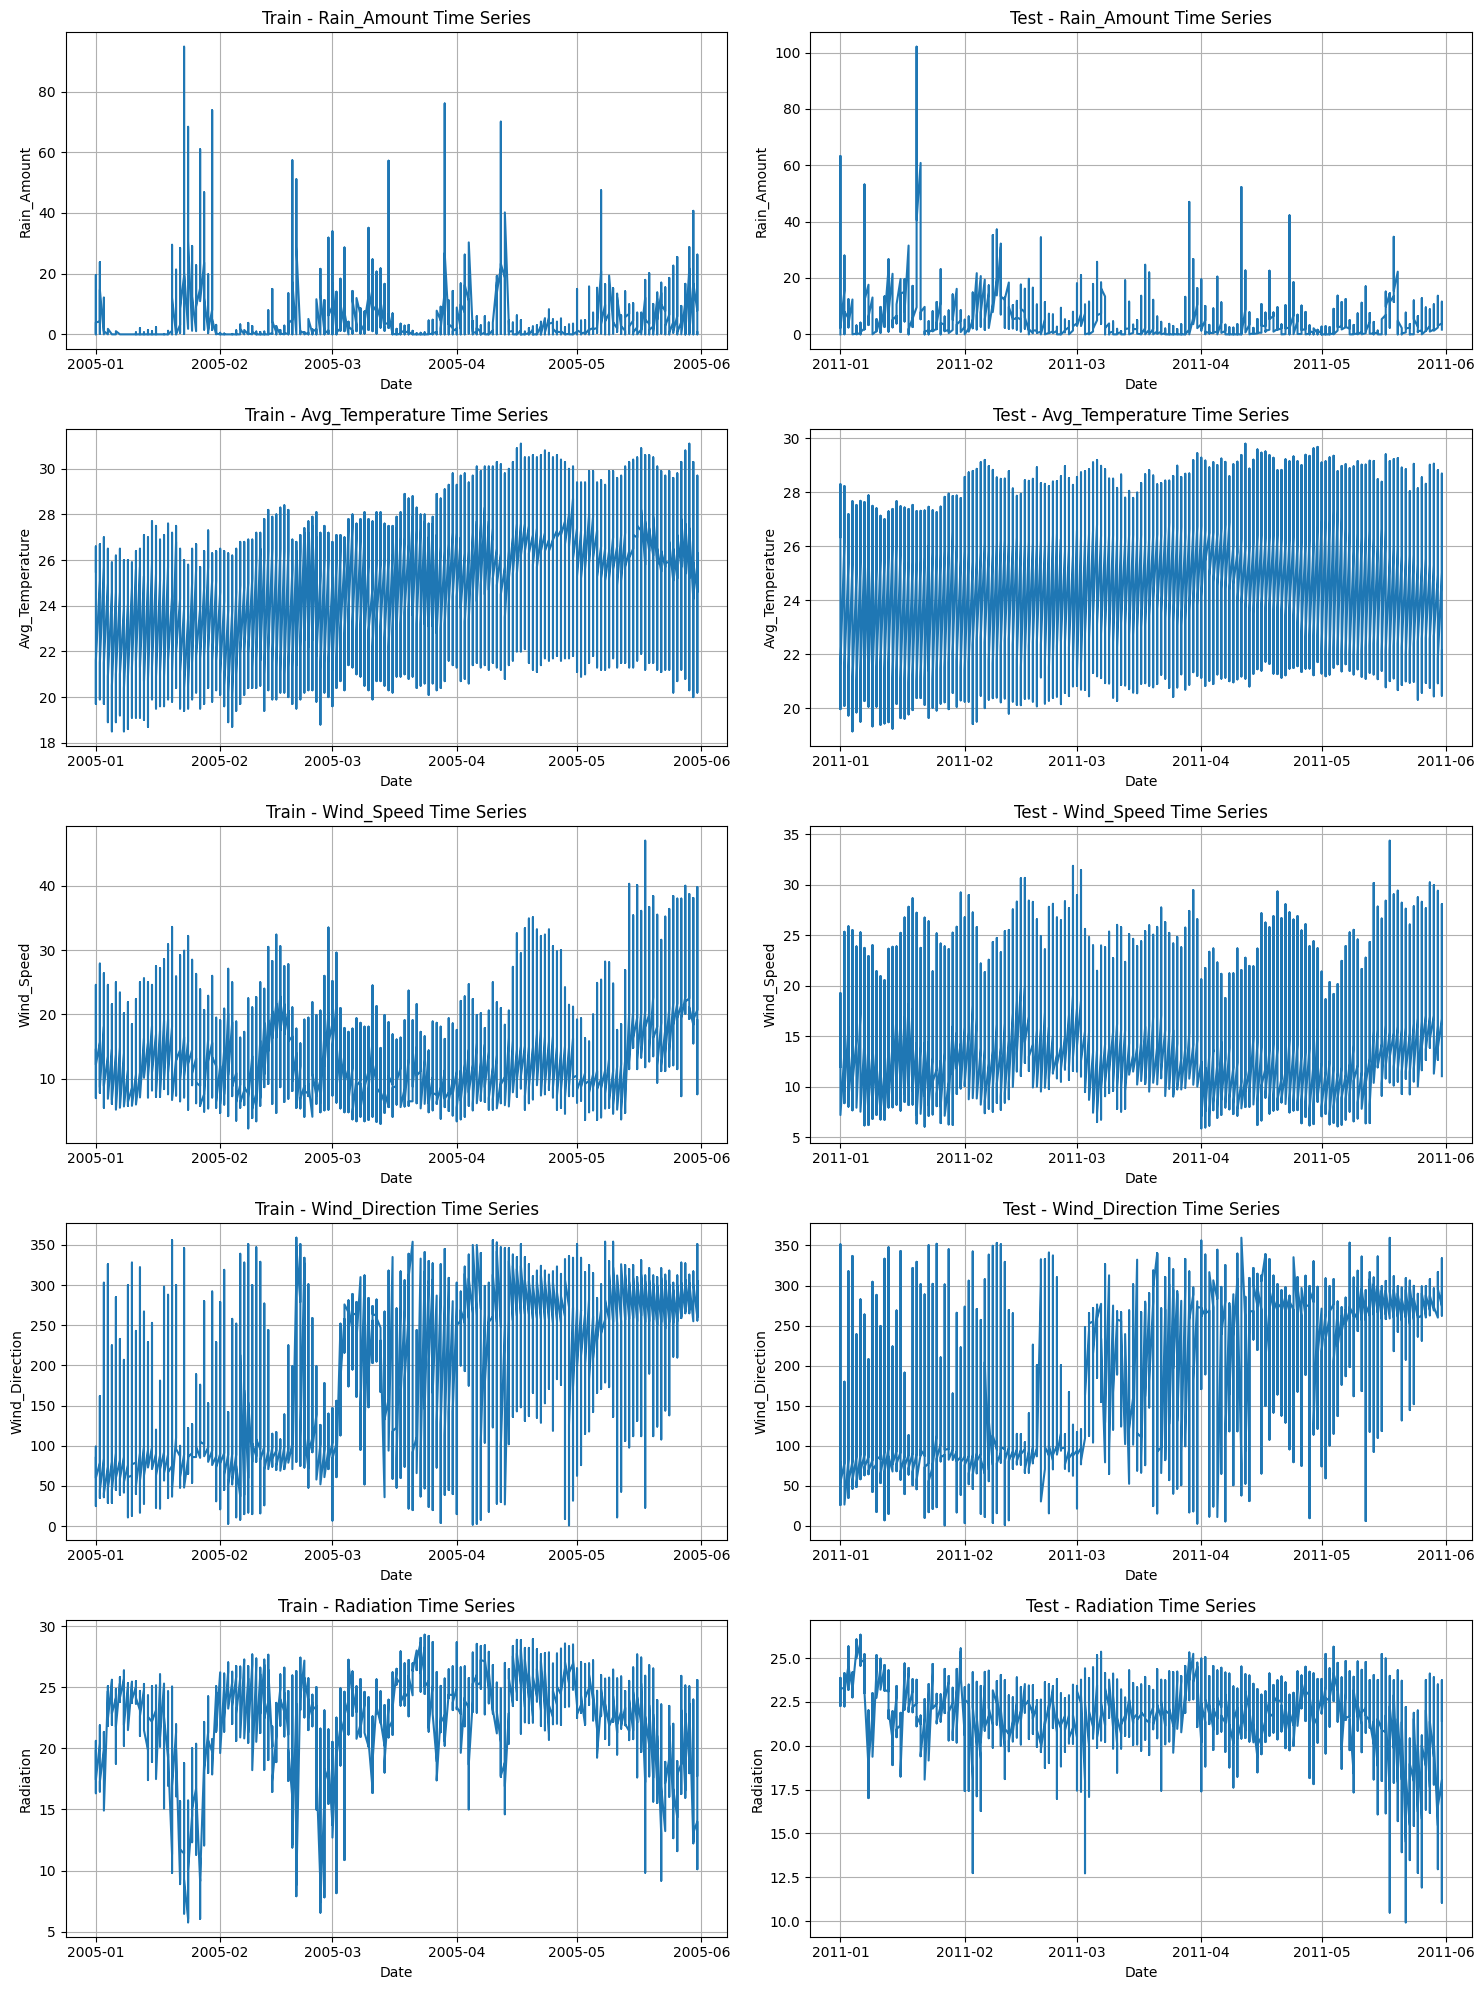

In [ ]:
# Create subplots for each time series
num_plots = len(time_series_columns)
fig, axes = plt.subplots(num_plots, 2, figsize=(15, 4 * num_plots)) # 2 columns for comparison

# Iterate through the columns and plot each time series
for i, col in enumerate(time_series_columns):
    # Plot on the first subplot (train data)
    axes[i, 0].plot(train_df['Date'], train_df[col])
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel(col)
    axes[i, 0].set_title(f'Train - {col} Time Series')
    axes[i, 0].grid(True)

    # Plot on the second subplot (test data)
    axes[i, 1].plot(merged_df['Date'], merged_df[col])
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel(col)
    axes[i, 1].set_title(f'Test - {col} Time Series')
    axes[i, 1].grid(True)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()
